<a href="https://colab.research.google.com/github/bonareri/Bitcoin-Prediction-Analysis/blob/main/Data_collection_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data collection

In [ ]:
!pip install yfinance pandas

In [ ]:
!pip install pycoingecko

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import requests

# Set seaborn style for better visualization
sns.set_style("darkgrid")

In [88]:
# Define the coins to compare
COINS = {
    "bitcoin": "BTC-USD",
    "ethereum": "ETH-USD",
    "solana": "SOL-USD"
}

# Function to get circulating supply from CoinGecko
def get_circulating_supply(coin_id):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}"
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        return data["market_data"].get("circulating_supply", None)
    except requests.exceptions.RequestException as e:
        print(f"Error fetching supply for {coin_id}: {e}")
        return None

# Function to fetch historical price data
def fetch_crypto_data(coin_id, ticker):
    print(f"Fetching data for {coin_id.upper()}...")

    crypto = yf.Ticker(ticker)
    df = crypto.history(period="max")

    if df.empty:
        print(f"Error: No historical data found for {coin_id}.")
        return None

    # Format data
    df.reset_index(inplace=True)
    df["Date"] = pd.to_datetime(df["Date"]).dt.strftime('%Y-%m-%d')

    # Get circulating supply
    circulating_supply = get_circulating_supply(coin_id)

    # Calculate Market Cap
    df["Market Cap"] = df["Close"] * circulating_supply if circulating_supply else None

    # Keep relevant columns
    df = df[["Date", "Close", "High", "Low", "Open", "Volume", "Market Cap"]]

    # Add coin name
    df.insert(0, "Coin", coin_id.upper())

    return df

# Main function
def main():
    all_data = []

    for coin_id, ticker in COINS.items():
        df = fetch_crypto_data(coin_id, ticker)
        if df is not None:
            all_data.append(df)

    if all_data:
        final_df = pd.concat(all_data)
        final_df.to_csv("crypto_comparison_BTC_ETH_SOL.csv", index=False)
        print("Data saved to crypto_comparison_BTC_ETH_SOL.csv")
    else:
        print("No data to save.")

if __name__ == "__main__":
    main()

Fetching data for BITCOIN...
Fetching data for ETHEREUM...
Fetching data for SOLANA...
Data saved to crypto_comparison_BTC_ETH_SOL.csv


In [89]:
#load data
df = pd.read_csv('crypto_comparison_BTC_ETH_SOL.csv')

In [90]:
df.head()

,Coin,Date,Close,High,Low,Open,Volume,Market Cap
0,BITCOIN,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800,9.066902e+09
1,BITCOIN,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200,8.414760e+09
2,BITCOIN,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700,7.827051e+09
3,BITCOIN,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600,8.106750e+09
4,BITCOIN,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100,7.906850e+09


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Coin        8240 non-null   object 
 1   Date        8240 non-null   object 
 2   Close       8240 non-null   float64
 3   High        8240 non-null   float64
 4   Low         8240 non-null   float64
 5   Open        8240 non-null   float64
 6   Volume      8240 non-null   int64  
 7   Market Cap  8240 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 515.1+ KB


In [92]:
#convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8240 entries, 0 to 8239
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Coin        8240 non-null   object        
 1   Date        8240 non-null   datetime64[ns]
 2   Close       8240 non-null   float64       
 3   High        8240 non-null   float64       
 4   Low         8240 non-null   float64       
 5   Open        8240 non-null   float64       
 6   Volume      8240 non-null   int64         
 7   Market Cap  8240 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 515.1+ KB


## Exploratory Data Analysis

### Summary Statistics

In [66]:
# Standardize the Coin column (if needed)
df['Coin'] = df['Coin'].replace({'BITCOIN': 'BTC', 'ETHEREUM': 'ETH', 'SOLANA': 'SOL'})

# Group the data by Coin and calculate summary statistics for 'Close'
coin_stats = df.groupby('Coin')['Close'].describe()

# Print the summary statistics for each coin
print(coin_stats)

# For additional specific stats like max, min, and trend:
btc_data = df[df['Coin'] == 'BTC']
eth_data = df[df['Coin'] == 'ETH']
sol_data = df[df['Coin'] == 'SOL']

# Additional statistics for BTC
btc_max = btc_data['Close'].max()
btc_min = btc_data['Close'].min()
btc_mean = btc_data['Close'].mean()
btc_median = btc_data['Close'].median()
btc_std = btc_data['Close'].std()

# Additional statistics for ETH
eth_max = eth_data['Close'].max()
eth_min = eth_data['Close'].min()
eth_mean = eth_data['Close'].mean()
eth_median = eth_data['Close'].median()
eth_std = eth_data['Close'].std()

# Additional statistics for SOL
sol_max = sol_data['Close'].max()
sol_min = sol_data['Close'].min()
sol_mean = sol_data['Close'].mean()
sol_median = sol_data['Close'].median()
sol_std = sol_data['Close'].std()

# Print detailed statistics for each coin
print("\nBTC Stats:")
print(f"Max: {btc_max}, Min: {btc_min}, Mean: {btc_mean}, Median: {btc_median}, Std Dev: {btc_std}")

print("\nETH Stats:")
print(f"Max: {eth_max}, Min: {eth_min}, Mean: {eth_mean}, Median: {eth_median}, Std Dev: {eth_std}")

print("\nSOL Stats:")
print(f"Max: {sol_max}, Min: {sol_min}, Mean: {sol_mean}, Median: {sol_median}, Std Dev: {sol_std}")

       count          mean           std         min          25%  \
Coin                                                                
BTC   3807.0  20588.036533  23711.616592  178.102997  1278.034973   
ETH   2658.0   1520.862680   1235.338279   84.308296   274.324028   
SOL   1775.0     72.477203     71.122566    0.515273    18.246237   

              50%           75%            max  
Coin                                            
BTC   9508.993164  32941.566406  106146.265625  
ETH   1455.794006   2472.060547    4812.087402  
SOL     35.556404    136.751877     261.869751  

BTC Stats:
Max: 106146.265625, Min: 178.10299682617188, Mean: 20588.036532851696, Median: 9508.9931640625, Std Dev: 23711.616592258895

ETH Stats:
Max: 4812.08740234375, Min: 84.30829620361328, Mean: 1520.8626796960652, Median: 1455.7940063476562, Std Dev: 1235.338279196193

SOL Stats:
Max: 261.8697509765625, Min: 0.5152729749679565, Mean: 72.47720257920278, Median: 35.55640411376953, Std Dev: 71.12256592

### Frequency Distribution

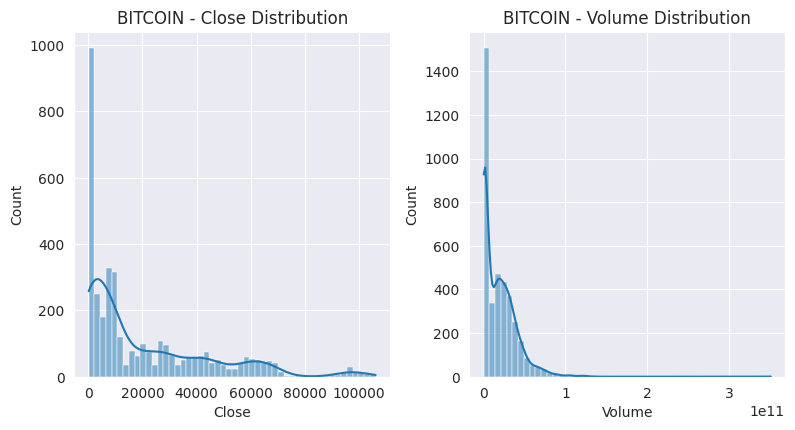

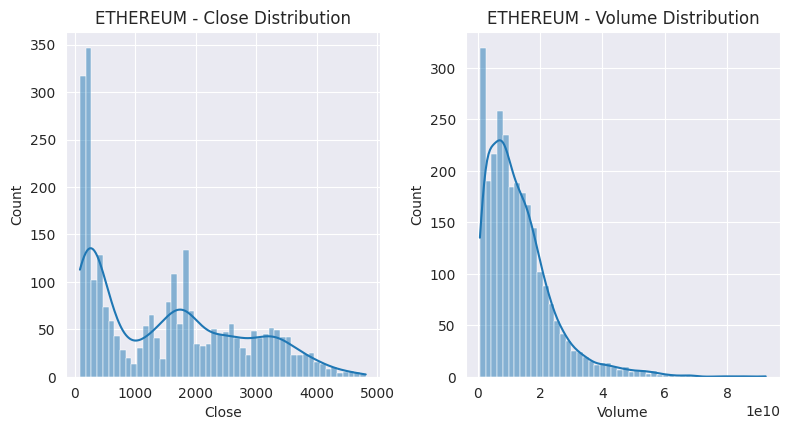

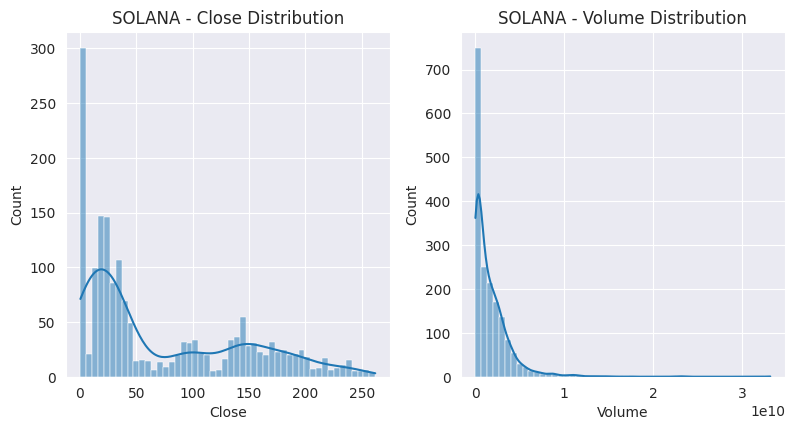

In [40]:
def plot_histograms(df, coin_name):
    numeric_cols = ["Close", "Volume"]

    plt.figure(figsize=(12, 8))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(2, 3, i)
        if col in df.columns and df[col].notna().sum() > 0:
            sns.histplot(df[col].dropna(), bins=50, kde=True)
            plt.title(f"{coin_name.upper()} - {col} Distribution")
        else:
            plt.title(f"{coin_name.upper()} - {col} (No Data)")

    plt.tight_layout()
    plt.show()

# Usage:
plot_histograms(btc, "Bitcoin")
plot_histograms(eth, "Ethereum")
plot_histograms(sol, "Solana")

### Correlation Matrix

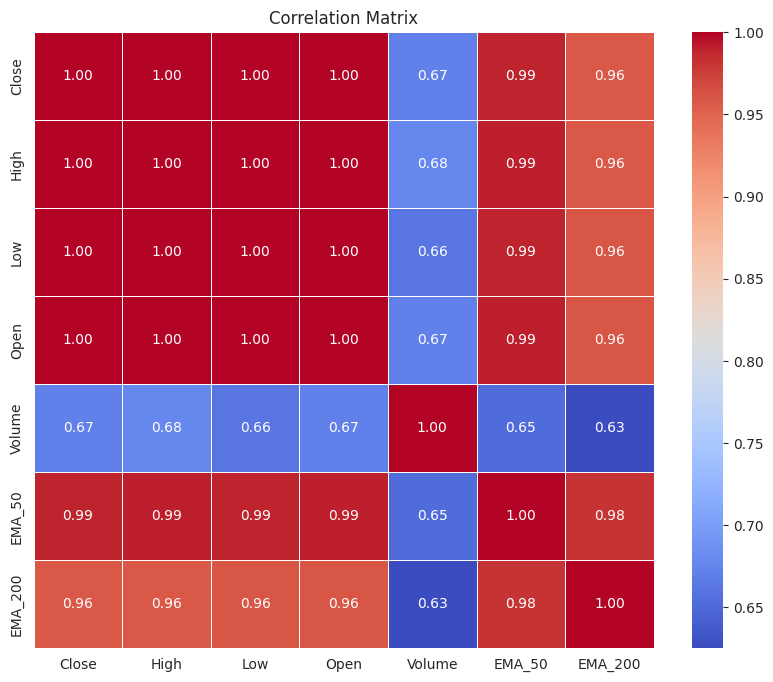

In [67]:
def plot_correlation_matrix(df):
    # Select numeric columns only
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Calculate the correlation matrix
    corr_matrix = df[numeric_cols].corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Matrix")
    plt.show()

# Usage:
plot_correlation_matrix(btc)  # Replace 'btc'

### Closing Price Over Time

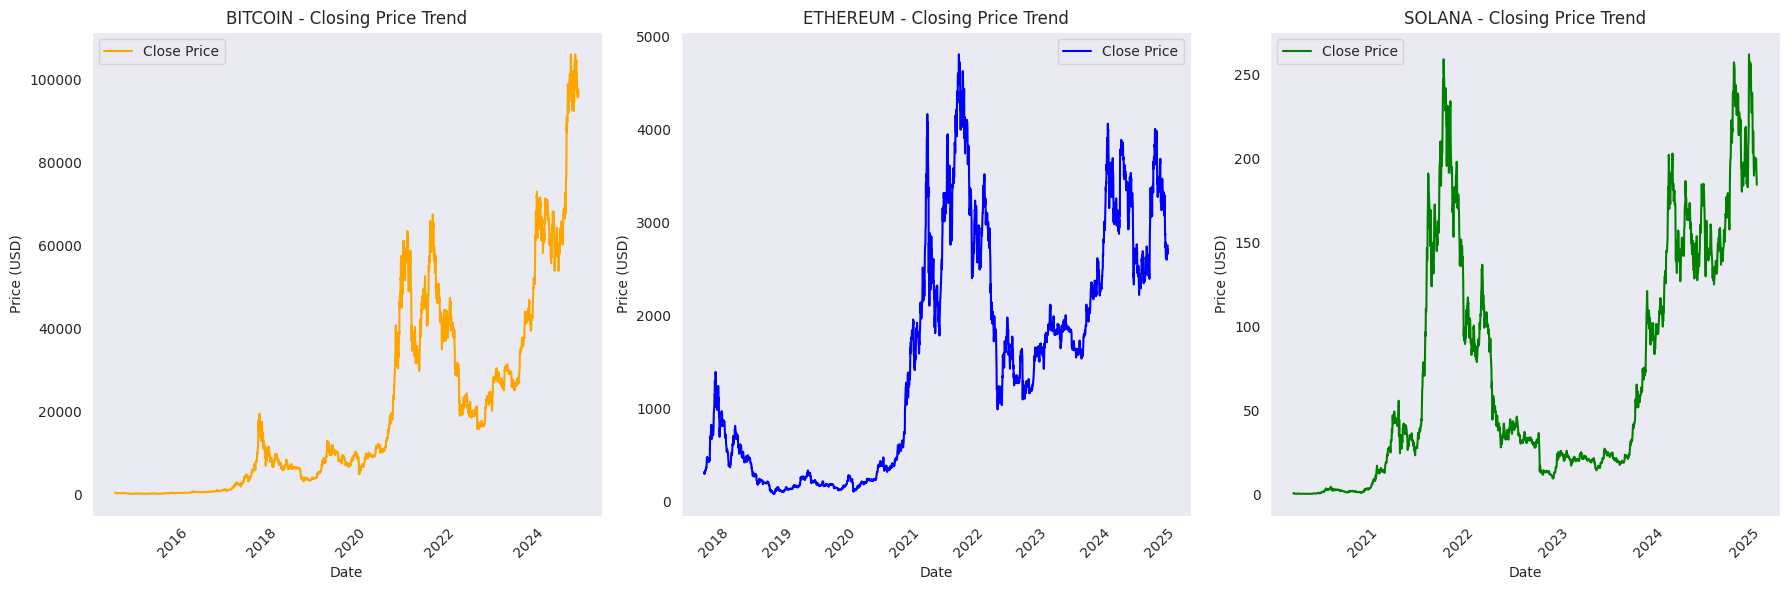

In [44]:
def plot_price_trend_horizontal(btc, eth, sol):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

    coins = [("Bitcoin", btc), ("Ethereum", eth), ("Solana", sol)]
    colors = ["orange", "blue", "green"]  # Colors for each coin

    for ax, (coin_name, df), color in zip(axes, coins, colors):
        ax.plot(df.index, df["Close"], label="Close Price", color=color)
        ax.set_title(f"{coin_name.upper()} - Closing Price Trend")
        ax.set_xlabel("Date")
        ax.set_ylabel("Price (USD)")
        ax.legend()
        ax.tick_params(axis='x', rotation=45)
        ax.grid()

    plt.tight_layout()
    plt.show()

# Usage:
plot_price_trend_horizontal(btc, eth, sol)

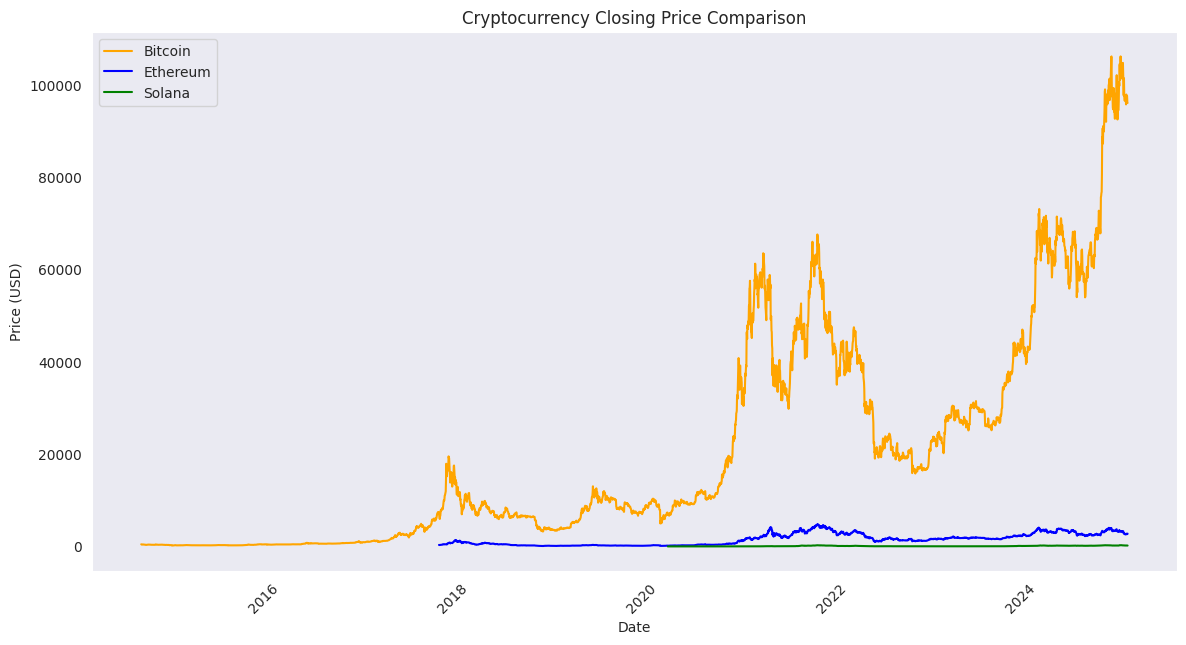

In [79]:
def plot_price_comparison(btc, eth, sol):
    plt.figure(figsize=(14, 7))

    # Plot each coin's closing price
    plt.plot(btc.index, btc["Close"], label="Bitcoin", color="orange")
    plt.plot(eth.index, eth["Close"], label="Ethereum", color="blue")
    plt.plot(sol.index, sol["Close"], label="Solana", color="green")

    # Title and labels
    plt.title("Cryptocurrency Closing Price Comparison")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")

    # Legend and grid
    plt.legend()
    plt.grid()

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

# Usage:
plot_price_comparison(btc, eth, sol)

### **Key Insights**

**1️⃣ Bitcoin (BTC) Dominates Price Trends**
- **BTC (orange)** remains the highest-priced cryptocurrency.
- Surged past **$100,000 in 2024**, showing strong market confidence.
- **Historical peaks in 2017, 2021, and 2024** indicate repeated bull cycles.

**2️⃣ Ethereum (ETH) Shows Moderate Growth**
- **ETH (blue)** has a much lower price range compared to BTC.
- Peaked around **$5,000** in previous bull cycles.
- **Gradual upward trend**, showing solid adoption.

**3️⃣ Solana (SOL) Remains Relatively Lower in Price**
- **SOL (purple)** shows price spikes after 2021 but remains below BTC & ETH.




### Market Capitalization

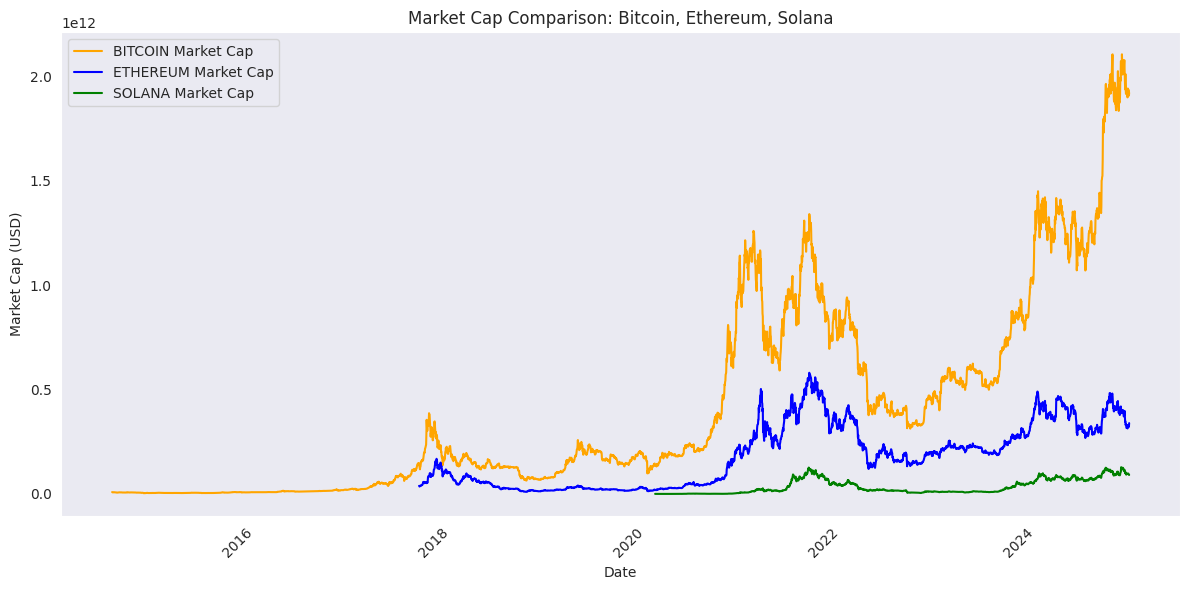

In [97]:
import matplotlib.pyplot as plt

def plot_market_cap_comparison(df):
    # Create a plot
    plt.figure(figsize=(12, 6))

    # Define coin names and colors
    coins = ["BITCOIN", "ETHEREUM", "SOLANA"]
    colors = ["orange", "blue", "green"]

    # Loop over each coin and plot its market cap
    for coin, color in zip(coins, colors):
        # Filter the dataframe for the current coin
        coin_df = df[df['Coin'] == coin]

        # Plot the Market Cap for the current coin
        plt.plot(coin_df['Date'], coin_df['Market Cap'], label=f'{coin} Market Cap', color=color)

    # Set titles and labels
    plt.title('Market Cap Comparison: Bitcoin, Ethereum, Solana')
    plt.xlabel('Date')
    plt.ylabel('Market Cap (USD)')
    plt.legend()
    plt.grid()

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Usage: Assuming 'df' is your combined dataframe
plot_market_cap_comparison(df)

### Trading Volume Trends   




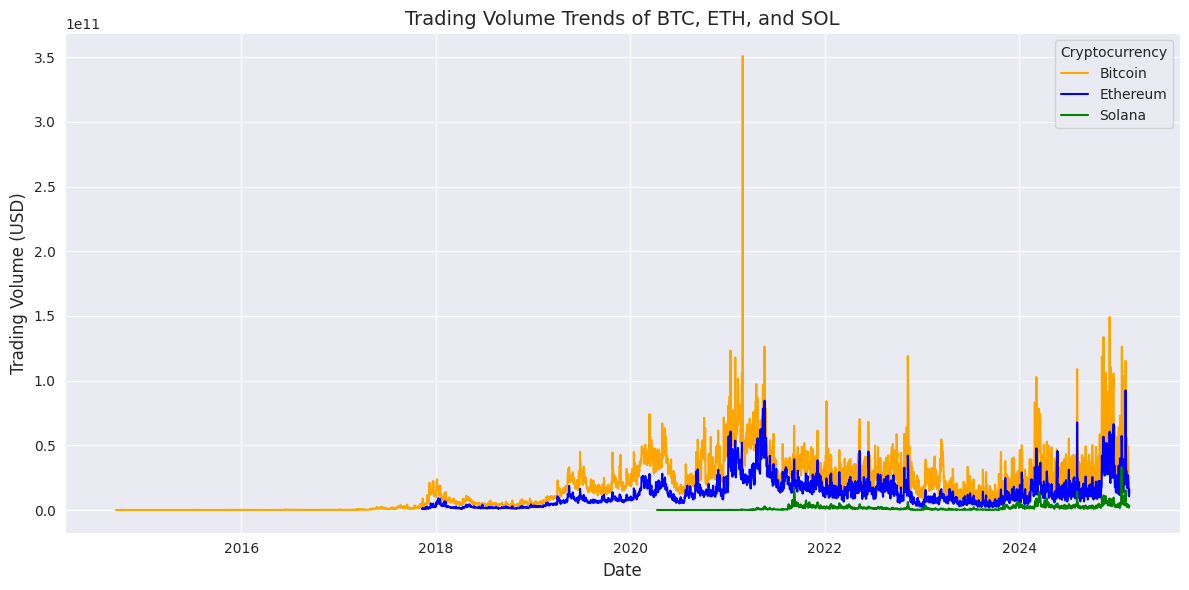

In [84]:
def plot_trading_volume(df_list, coin_names):
    # Create a figure for the plot
    plt.figure(figsize=(12, 6))

    colors = ["orange", "blue", "green"]  # Colors for each coin

    # Loop through each dataframe and coin to plot
    for i, (df, coin_name) in enumerate(zip(df_list, coin_names)):
        # Plot the trading volume for each coin
        sns.lineplot(data=df, x="Date", y="Volume", label=coin_name, color=colors[i])

    # Chart formatting
    plt.title("Trading Volume Trends of BTC, ETH, and SOL", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Trading Volume (USD)", fontsize=12)
    plt.legend(title="Cryptocurrency")
    plt.grid(True)

    # Show the plot
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

# Usage with multiple coins:
plot_trading_volume([btc, eth, sol], ["Bitcoin", "Ethereum", "Solana"])

1️⃣ Bitcoin (BTC) Dominates Trading Volume  
- **BTC (orange)** has the highest trading volume over time, especially during market peaks.  
- Major **spikes align with market cycles** (e.g., 2021 bull run).  

2️⃣ Ethereum (ETH) Has Consistently High Volume  
- **ETH (blue)** follows BTC’s trend but at a lower scale.  
- Shows **sustained liquidity**, indicating strong investor interest.  

3️⃣ Solana (SOL) Gained Traction Post-2020  
- **SOL (green)** had minimal trading before 2020 but grew rapidly.  
- Lower volume than BTC & ETH, but **trading activity is increasing**.  

 4️⃣ Volume Spikes Correlate with Market Events  
- **2021:** Crypto bull run → **Highest trading activity ever recorded**.  
- **2022:** Market crash → **Sharp spikes, indicating panic selling**.  
- **2024:** Volume stabilizes but remains **volatile, especially for BTC**.  

###  Moving Averages (EMA)

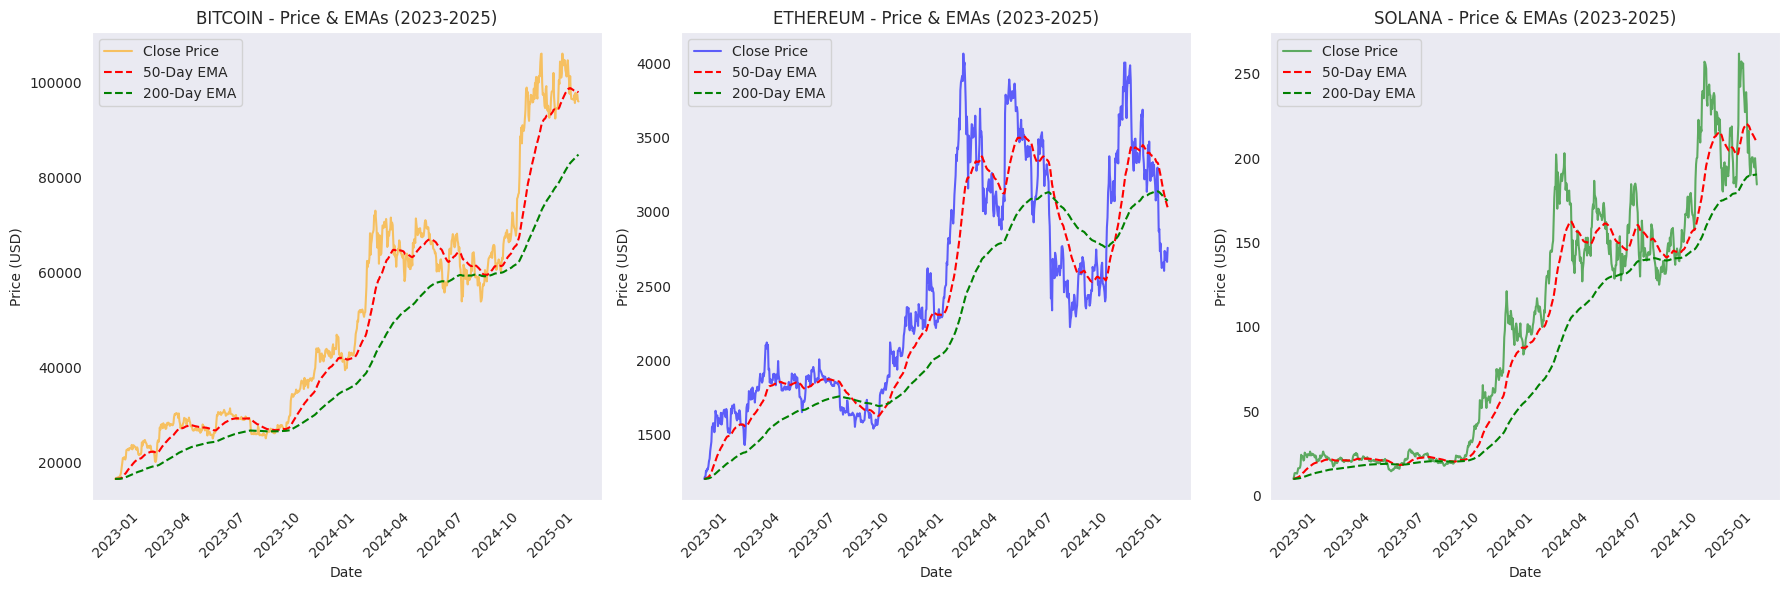

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_price_trend_horizontal(btc, eth, sol):
    # Create subplots: 1 row, 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns for combined plot

    coins = [("Bitcoin", btc), ("Ethereum", eth), ("Solana", sol)]
    colors = ["orange", "blue", "green"]  # Colors for each coin

    # Filter data from 2023 to 2025 and plot
    for ax, (coin_name, df), color in zip(axes, coins, colors):
        # Filter the data to include only dates between 2023 and 2025
        df_filtered = df[(df.index >= "2023-01-01") & (df.index <= "2025-12-31")].copy()  # Make a copy

        # Calculate EMAs for the filtered data
        df_filtered["EMA_50"] = df_filtered["Close"].ewm(span=50, adjust=False).mean()
        df_filtered["EMA_200"] = df_filtered["Close"].ewm(span=200, adjust=False).mean()

        # Plot Close Price and EMAs on the primary y-axis
        ax.plot(df_filtered.index, df_filtered["Close"], label="Close Price", color=color, alpha=0.6)
        ax.plot(df_filtered.index, df_filtered["EMA_50"], label="50-Day EMA", color="red", linestyle="dashed")
        ax.plot(df_filtered.index, df_filtered["EMA_200"], label="200-Day EMA", color="green", linestyle="dashed")

        # Set titles and labels
        ax.set_title(f"{coin_name.upper()} - Price & EMAs (2023-2025)")
        ax.set_xlabel("Date")
        ax.set_ylabel("Price (USD)")
        ax.legend(loc="upper left")

        ax.grid()

    # Rotate the x-axis labels for all subplots
    for ax in axes:
        ax.tick_params(axis='x', rotation=45)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Usage:
plot_price_trend_horizontal(btc, eth, sol)

### Volatility Analysis Using Rolling Standard Deviation
Volatility measures how much prices fluctuate over time. Higher volatility indicates higher risk but also higher potential returns.

- Rolling Volatility (30-Day Standard Deviation)

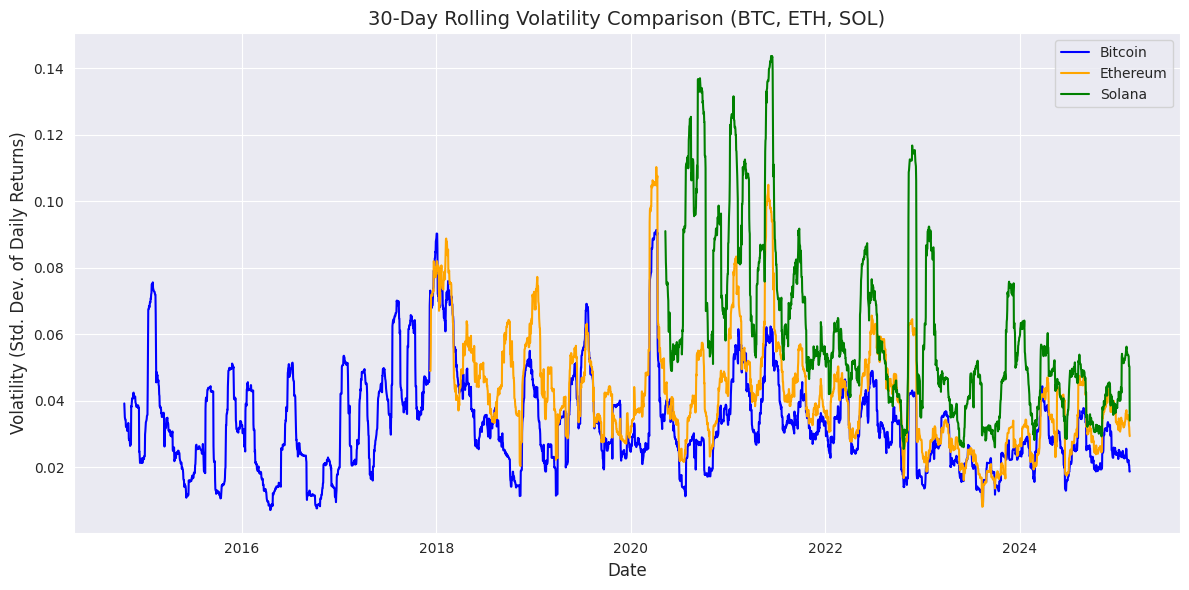

In [ ]:
def plot_rolling_volatility_comparison(df_list, coin_names):
    # Create a figure for the plot
    plt.figure(figsize=(12, 6))

    colors = ["blue", "orange", "green"]  # Colors for each coin

    # Loop through each dataframe and coin to plot
    for i, (df, coin_name) in enumerate(zip(df_list, coin_names)):
        # Calculate Daily Returns
        df["Daily Return"] = df["Close"].pct_change()

        # Calculate 30-day Rolling Volatility
        df["Rolling Volatility"] = df["Daily Return"].rolling(window=30).std()

        # Plot Rolling Volatility for each coin on the same graph
        sns.lineplot(data=df, x="Date", y="Rolling Volatility", label=coin_name, color=colors[i])

    # Formatting the plot
    plt.title("30-Day Rolling Volatility Comparison (BTC, ETH, SOL)", fontsize=14)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Volatility (Std. Dev. of Daily Returns)", fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.show()

# Usage with multiple coins:
plot_rolling_volatility_comparison([btc, eth, sol], ["Bitcoin", "Ethereum", "Solana"])

### Key Insights from the Volatility Analysis  

 1️⃣ Bitcoin (BTC) Shows the Most Stability  
- BTC (orange) maintains relatively low volatility over time.  
- This suggests it is more **established** and less reactive to short-term market movements.  

 2️⃣ Ethereum (ETH) and Solana (SOL) Are More Volatile  
- ETH (blue) experiences **moderate fluctuations**, especially during market shifts.  
- SOL (green) has the **highest volatility**, with frequent sharp spikes.  
- Post-2021, **SOL's volatility exceeds ETH & BTC**, indicating **higher speculative activity**.  

3️⃣ Volatility Spikes Align with Major Market Events  
- 2018: Crypto market crash → Sudden surge in volatility.  
- 2020: Pandemic-driven uncertainty → Increased market swings.  
- 2021: **Bull run & corrections** → Highest volatility levels observed.  



### Relative Strength Index (RSI)

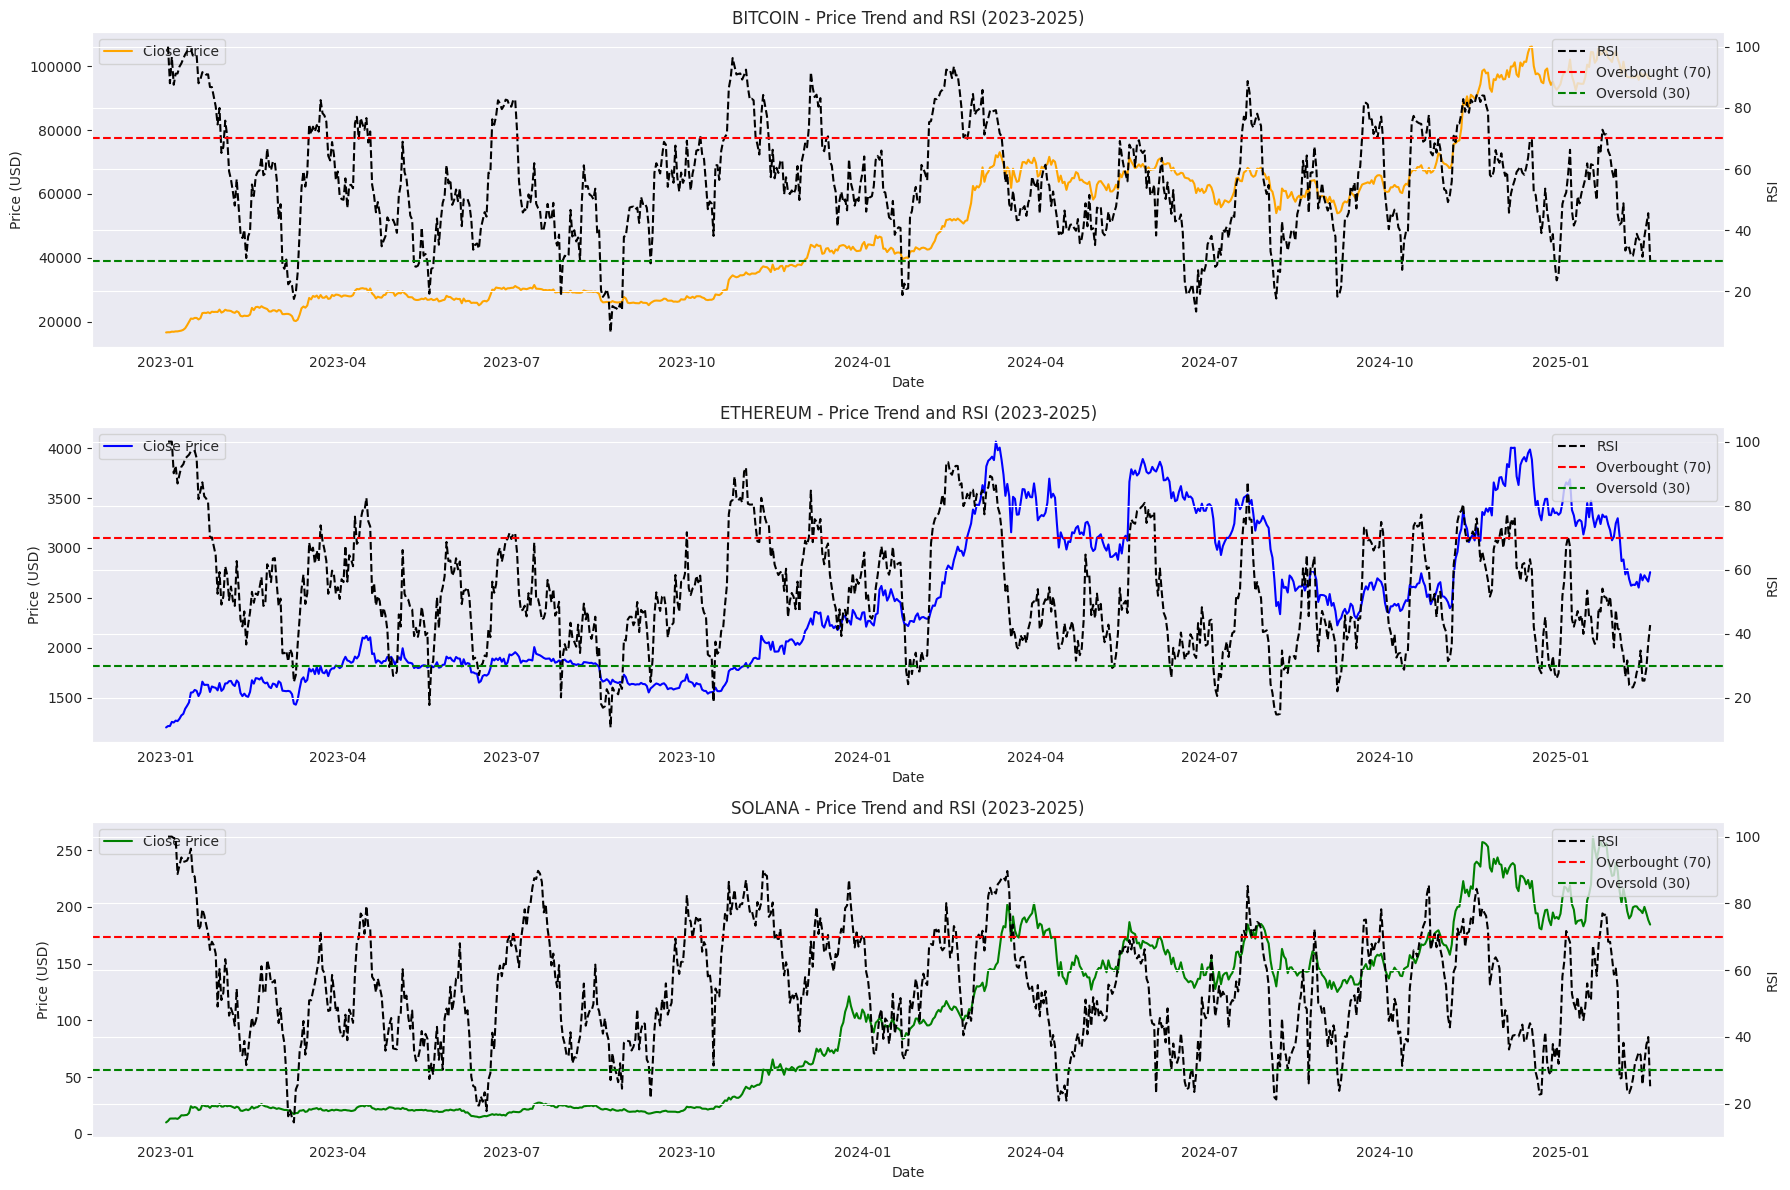

In [50]:
def calculate_rsi(df, window=14):
    """
    Calculate the Relative Strength Index (RSI) for the given data.

    :param df: DataFrame with 'Close' price data
    :param window: The period over which RSI is calculated (default is 14 days)
    :return: RSI values as a pandas Series
    """
    delta = df['Close'].diff()  # Calculate the difference between consecutive closing prices
    gain = (delta.where(delta > 0, 0))  # Gains (positive changes)
    loss = (-delta.where(delta < 0, 0))  # Losses (negative changes)

    # Calculate the average gain and loss over the window period
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    # Calculate the Relative Strength (RS)
    rs = avg_gain / avg_loss

    # Calculate the RSI using the formula
    rsi = 100 - (100 / (1 + rs))

    return rsi

def plot_price_trend_and_rsi(btc, eth, sol):
    fig, axes = plt.subplots(3, 1, figsize=(18, 12))  # 3 rows, 1 column for combined plot

    coins = [("Bitcoin", btc), ("Ethereum", eth), ("Solana", sol)]
    colors = ["orange", "blue", "green"]  # Colors for each coin

    # Filter data from 2023 to 2025
    for ax, (coin_name, df), color in zip(axes, coins, colors):
        # Filter the data to include only dates between 2023 and 2025
        df_filtered = df[(df.index >= "2023-01-01") & (df.index <= "2025-12-31")]

        # Calculate the RSI for the filtered data
        rsi = calculate_rsi(df_filtered)  # Calculate RSI

        # Plot Close Price and RSI on the same graph
        ax1 = ax.twinx()  # Create a second y-axis for the RSI plot

        # Plot Close Price on the primary y-axis
        ax.plot(df_filtered.index, df_filtered["Close"], label="Close Price", color=color)
        ax.set_title(f"{coin_name.upper()} - Price Trend and RSI (2023-2025)")
        ax.set_xlabel("Date")
        ax.set_ylabel("Price (USD)")
        ax.legend(loc="upper left")
        ax.grid()

        # Plot RSI on the secondary y-axis
        ax1.plot(df_filtered.index, rsi, label="RSI", color='black', linestyle="--")
        ax1.axhline(y=70, color='red', linestyle='--', label="Overbought (70)")
        ax1.axhline(y=30, color='green', linestyle='--', label="Oversold (30)")
        ax1.set_ylabel("RSI")
        ax1.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

# Usage:
plot_price_trend_and_rsi(btc, eth, sol)